
<img src="images/ipsa_logo.png" width="100" align="right">

# Ma422- 2022/2023

# <font color='yellow'> Introduction to Machine Learning</font>

---
1. [Set-Up](#Set-Up)
2. [Linear regression with one variable](#LinearRegression)
 * [Visualize the Word count vs. #Shares](#VS)
 * [Gradient Descent](#GD)
3. [Linear regression with multiple variables](#LinearRegression2)
 * [Feature Scaling](#FeatureScaling)
 * [Gradient Descent](#GD2)
 * [Normal Equation](#NE)
---

Welcome to the Intoduction to Machine Learning Course.

The objective of this lab session is to code linear regression and to apply the algorithm to real data. You will predict how many times a Machine Learning article will be shared on Social Networks according to some of its characteristics.


## <font color='black'>Set-Up</font>

---

First we will import the packages that we will need throughout the notebook.

In [82]:
# Tell Jupyter to display plots in this notebook.
%matplotlib inline

# Import the numpy package with the alias np.
import numpy as np           
import pandas as pd

# Import the pyplot package from matplotlib with the alias plt.
import matplotlib.pyplot as plt  
import matplotlib.cm as cm
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (4, 4)

## <font color='yellow'>Linear regression with one variable</font>

---

Before starting on any task, it is often useful to understand the data by visualizing them. 

In [83]:
# ======================= Load the data =======================
data = pd.read_csv("./data/articulos_ml.csv")

In [84]:
# ======================= Check the dimensions ================
data.shape

(161, 8)

In [85]:
# ======================= Let's visualize the first rows
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Remark that some entries (as for instance in the comments column) are empty.

In our case, the column Shares will correspond to the target value, y.

In [86]:
# ======================= Display some statistics from the dataset =======================
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In this table, we can read that the the mean number of words is 1808.
There is an article with a minimum of 250 words and a maximum of 8401.

Concerning the outputs, the minimum is 0 times shared and the maximum is shared 350000.

### Visualize the Word count vs. #Shares

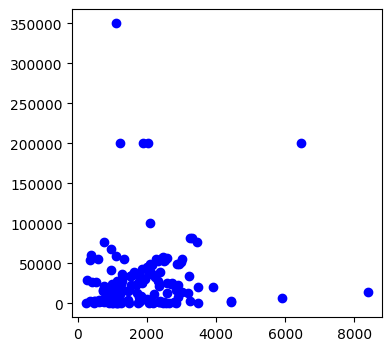

In [87]:
f1 = data['Word count'].values
f2 = data['# Shares'].values
    
plt.scatter(f1, f2, c='b')
plt.show()

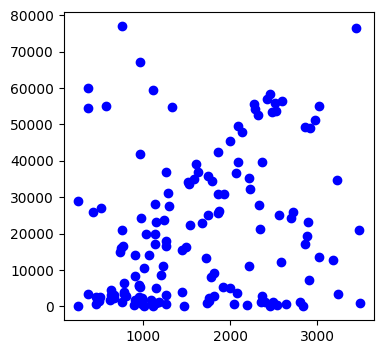

In [88]:
# We apply a cut to the oringal dataset
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
    
plt.scatter(f1, f2, c='b')
plt.show()

We will analyze the resulting dataset.

In [89]:
dataX =filtered_data[["Word count"]]
X = np.array(dataX)
y = filtered_data['# Shares'].values

### <font color='yellow'> Gradient Descent</font>

In this part, you will fit the linear regression parameters  $\theta$  to the dataset using gradient descent.

Recall that the parameters of your model are the  $\theta_𝑗$  values. These are the values you will adjust to minimize cost  $𝐽(\theta)$ .

In the following lines, we add another dimension to our data to account for the  $\theta_0$  intercept term. We also initialize the parameters to $0$ and the learning rate  $\alpha$  to $0.01$.

In [90]:
# =================== Cost and Gradient descent ===================

# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)
theta = np.zeros(2); # initialize fitting parameters

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. 

Firstly you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent.

Complete the function below that computes $J(\theta)$. 
Once you have completed the function, the next step will run computeCost once using $\theta$ initialized to zeros, and you will see the cost printed to the screen.

In [91]:
# EDIT THIS CELL
def computeCost(X, y, theta):
    #COMPUTECOST Compute cost for linear regression
    #   using theta as the parameter for linear regression to fit the data points in X and y
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples

    #You need to return the following variables correctly
    h = X @ theta # hypothesis
    J = 1/(2*m) * np.sum((h - y)**2)

    return J

In [92]:
J = computeCost(X, y, theta)

print('With theta = [0 ; 0] Cost computed = ' , J)
print('Expected cost value (approx) 408398897.763\n');

With theta = [0 ; 0] Cost computed =  408398897.76351357
Expected cost value (approx) 408398897.763



Next, you will implement gradient descent. The loop structure has already been written. You only need to supply the updates to $\theta$ within each iteration.

A good way to verify that gradient descent is working is to look at the value of $J(\theta)$ and check that it is decreasing with each step. The code calls computeCost on every iteration and prints the cost. If you have implemented gradient descent and computeCost correctly, your value of $J(\theta)$ should never increase, and should converge to a  value by the end of the algorithm.

After you have finished, you will use the final parameters to plot the linear fit. 

In [93]:
# EDIT THIS CELL
def gradientDescent(X, y, theta, alpha, num_iters):
    
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ====================================================================
        h = X @ theta # hypothesis
        dJ = (1/m) * X.T @ (h - y)
        theta += - alpha * dJ
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    
    return theta, J_history   

In [94]:
theta = np.zeros(2) # initialize fitting parameters

# Some gradient descent settings
iterations = 1000
alpha = 1e-8

theta, J = gradientDescent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent:\n')
print(theta)
print('Expected theta values (approx)\n')
print(' 0.0278\n  11.162\n\n')

Theta found by gradient descent:

[ 0.02780782 11.16293235]
Expected theta values (approx)

 0.0278
  11.162




## <font color='yellow'> Linear regression with multiple variables</font>
---

In this part, you will implement linear regression with multiple variables to predict the number of shares of a machine learning article. We will create a new variable that is the sum of the links, comments and images.

In [95]:
# ======================= Load the data =======================

suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
X = np.array(dataX2)
y = filtered_data['# Shares'].values

m = y.shape[0] # number of training examples

### Feature Scaling

By looking at the values, note that the word count are about 1000 times the sum of the other variables. When features differ by orders of magnitude, performing feature scaling can make gradient descent converge much more quickly.

You need to fill the cell below to perform feature scaling.

Subtract the mean value of each feature from the dataset.
After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviation".
When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation.

Given a new input x, we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [96]:
# EDIT THIS CELL
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    # ===========================================================

    X_norm = X.copy()
    mu = np.mean(X, axis=0) # mean of feature
    sigma = np.std(X, axis=0) # standard deviation

    X_norm -= mu
    X_norm /= sigma


    # ============================================================

    return X_norm, mu, sigma

In [97]:
X_norm, mu, sigma = featureNormalize(X)

#Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

### <font color='yellow'> Gradient Descent</font>


Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. 

The hypothesis function and the batch gradient descent update rule remain unchanged.
If your code in the previous part (single variable) already supports multiple variables, you can use it here too.

In [98]:
#EDIT THIS CELL
def computeCostMulti(X, y, theta):

    # Initialize some useful values
    m = y.shape[0] # number of training examples

    # ===============================================================
    h = X @ theta
    J = (1 / (2 * m)) * np.sum((h - y)**2)
    # ==================================================================

    return J

In [99]:
#EDIT THIS CELL
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    m = y.shape[0] # number of training examples

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()

    J_history = [] # Use a python list to save cost in every iteration

    for i in range(num_iters):
        # ====================================================================
        h = X @ theta
        dJ = (1/m) * X.T @ (h - y)
        theta += - alpha * dJ
        # =====================================================================

        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))

                                      
    return theta, J_history 

In [100]:
# ================ Gradient Descent ================

# Choose some alpha value
alpha = 0.1
num_iters = 50

# Init Theta and Run Gradient Descent 
theta = np.zeros(3)

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters);

Now you will to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the variable above and changing the part of the code that sets the learning rate.

The cell bellow plots the values of  $𝐽(\theta)$  against the number of the iterations. If you picked a good value for the learning rate, the cost will decrease in every iteration. If the value of $J(\theta)$ increases, adjust your learning rate and try again. You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

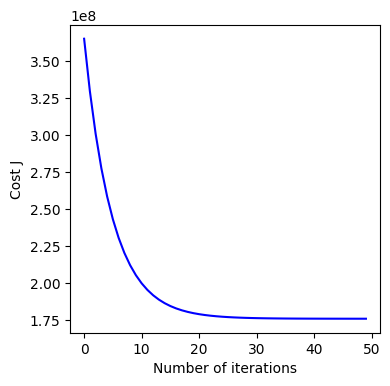

In [101]:
plt.figure()
plt.plot(np.arange(0,num_iters), J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J');

In [102]:
# Display gradient descent's result
print('Theta computed from gradient descent: \n')
print(theta);

Theta computed from gradient descent: 

[20439.76099402  5367.70572687 -4557.15174504]


In [121]:
# Predict the value of a new input x = [515, 7]

# ===========================================================
# Recall you need to add the column of ones and normalize the input vector

x = np.array([515.0, 7.0])
X_norm, mu, sigma = featureNormalize(x)
X_norm = np.concatenate([np.ones((1, 1)), X_norm.reshape(1, -1)], axis=1)
shares = X_norm @ theta

# ============================================================

print('Predicted number of shares: \n', shares[0])
print('True number of shares: 27000')

Predicted number of shares: 
 30364.618465933392
True number of shares: 27000


### Normal Equations


We have seen that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T {y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence” like in gradient descent.
Complete the code below to use the formula to calculate $\theta$. Remember that while you don’t need to scale your features, we still need to add a column of 1’s to the X matrix to have an intercept term ($\theta_0$). 

In [122]:
# ================ Normal Equations ================

# Load Data
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
X = np.array(dataX2)
y = filtered_data['# Shares'].values

m = y.shape[0] # number of training examples

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Complete the cell below for the function `normalEqn`. You should use the formula above to calculate $\theta$. 

In [133]:
#EDIT THIS CELL
def normalEqn(X, y):

    # ================================================================

    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    
    # =================================================================
    return theta

In [134]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

#Display normal equation's result
print('Theta computed from the normal equation : \n');
print(theta);

Theta computed from the normal equation : 

[ 1.69218911e+04  6.63216324e+00 -4.83407538e+02]


In [135]:
# Predict the value of a new input x = [515, 7]

# ============================================================
# Recall you need to add the column of ones and normalize the input vector

x = np.array([515.0, 7.0])
X_norm, mu, sigma = featureNormalize(x)
X_norm = np.concatenate([np.ones((1, 1)), X_norm.reshape(1, -1)], axis=1)
shares = X_norm @ theta

# ============================================================

print('Predicted number of shares: (using normal equations)\n', shares[0])
print('True number of shares: 27000')

Predicted number of shares: (using normal equations)
 17411.930799269514
True number of shares: 27000
